Implementation of the Linear Regression algorithm from scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculating the sum of squares for a given line and data

sum of squares = 28.096969704500005


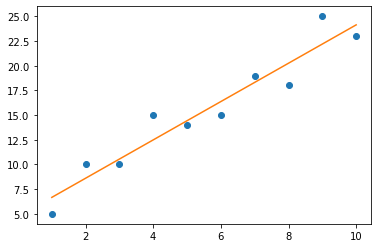

In [6]:
points = pd.read_csv("https://bit.ly/2KF29Bd").itertuples()

# Test with a given line
m = 1.93939
b = 4.73333

sum_of_squares = 0.0

X = []
Y = []
# calculate sum of squares
for p in points:
    X.append(p.x)
    Y.append(p.y)

    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_predict - y_actual)**2
    sum_of_squares += residual_squared

print("sum of squares = {}".format(sum_of_squares))

X = np.array(X)
Y = np.array(Y)

# Plotting the points and the linear model
plt.plot(X, Y, 'o')
plt.plot(X, m*X+b)
plt.show()

# Finding best fitting line

## Calculating m and b for a simple linear regression

In [7]:
points = list(pd.read_csv("https://bit.ly/2KF29Bd", delimiter=",").itertuples())

n = len(points)

m = ( n * sum(p.x*p.y for p in points) - sum(p.x for p in points) * sum(p.y for p in points) ) / ( n * sum(p.x**2 for p in points) - sum(p.x for p in points)**2 )
b = ( sum(p.y for p in points) / n ) - m * sum(p.x for p in points) / n

print(m, b)

1.9393939393939394 4.7333333333333325


## Inverse Matrix Techniques

[1.93939394 4.73333333]


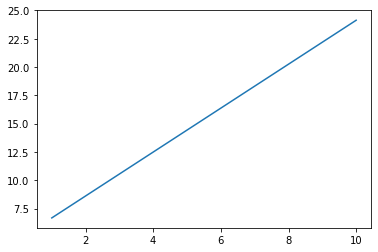

In [20]:
df = pd.read_csv("https://bit.ly/3goOAnt", delimiter=",")

# Extract input variables
X = df.values[:, :-1].flatten()
X

# Add placeholder 1 to generate intercept
X_1 = np.vstack( [ X, np.ones(len(X)) ] ).T
X_1

# Extract output column
Y = df.values[:, -1]
Y

# Calculate coefficients for slope and intercept
b = np.linalg.inv( X_1.transpose() @ X_1 ) @ ( X_1.transpose() @ Y )
print(b)

y_predict = X_1.dot(b)

plt.plot(X, y_predict)
plt.show();

## Gradient Descent

### Using Gradient Descent to find the minimum of a parabola

3.000000000000111 4.0


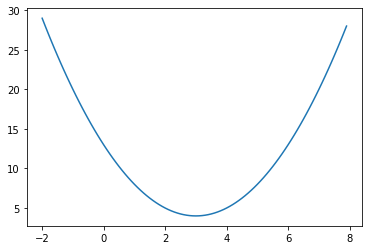

In [27]:
import random

def f(x):
    return (x-3) ** 2 + 4

def dx_f(x):
    return 2*(x-3)

# The learning rate
L = 0.001

# The number of iterations to perform gradient descent
iterations = 100_000

# start at a random x
x = random.randint(-15, 15)

for i in range(iterations):
    # get slope
    d_x = dx_f(x)

    # update x
    x -= L * d_x

print(x, f(x))

X = np.arange(-2, 8, 0.1)
y = np.array([ f(x) for x in X ])

plt.plot( X, y )
plt.show();

### Performing gradient descent for a linear regression

In [28]:
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

# Building the model
m = 0.0
b = 0.0

# Learning Rate
L = 0.001

# Number of iterations
iterations = 100_000

n = float(len(points))

# Perform Gradient Descent
for i in range(iterations):

    # slope with respect to m
    D_m = sum( 2 * p.x * ((m*p.x+b) - p.y) for p in points )

    # slope with respect to b
    D_b = sum( 2 * ((m*p.x+b) - p.y) for p in points )

    # update m and b
    m -= L * D_m
    b -= L * D_b

print("y = {0}x + {1}".format(m, b))

y = 1.9393939393939548x + 4.733333333333227


### using sympy

In [29]:
from sympy import *

m, b, i, n = symbols("m b i n")
x, y = symbols("x y", cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m)
d_b = diff(sum_of_squares, b)

print(d_m)
print(d_b)

Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))
Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))


## Stochastic Gradient Descent

In [31]:
data = pd.read_csv("https://bit.ly/2KF29Bd", header=0)

X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values

n = data.shape[0]

# Building the model
m = 0.0
b = 0.0

sample_size = 1
L = .0001
epochs = 1_000_000

# Performing stochastic gradient descent
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False)
    x_sample = X[idx]
    y_sample = Y[idx]

    # The current predicted value of Y
    Y_pred = m * x_sample + b

    # d/dm derivative of loss function
    D_m = (-2 / sample_size) * sum( x_sample * (y_sample - Y_pred) )

    # d/db derivative of loss function
    D_b = (-2 / sample_size) * sum( y_sample - Y_pred )
    m = m - L * D_m
    b = b - L * D_b

    # print progress
    if i % 10_000 == 0:
        print(i, m, b)

print(f"y = {m}x + {b}")

0 0.018000000000000002 0.003
10000 2.347328604411506 1.8579107919158273
20000 2.210650376831583 2.8597435787408703
30000 2.116599156006124 3.5036535897633216
40000 2.061599895729836 3.918858483670568
50000 2.026828558020853 4.209336097033093
60000 1.9989640387095888 4.395356917946499
70000 1.9682492240071223 4.513071742293571
80000 1.9599237589823741 4.583910392702485
90000 1.9567043637426906 4.628210774247987
100000 1.9559092500532436 4.658637908124662
110000 1.9540478873802976 4.691892337498738
120000 1.9563872072331303 4.708400220891792
130000 1.9476200621769642 4.72438993851311
140000 1.952281506279813 4.741961802510915
150000 1.9234270964344713 4.756612364950769
160000 1.960046339873816 4.756475259540948
170000 1.9537578704013039 4.733514860650321
180000 1.9629430991447263 4.722038502366107
190000 1.9173688756012457 4.729538422343885
200000 1.9497503874126625 4.736585440437299
210000 1.9317531416474032 4.743077434497675
220000 1.9414241372591823 4.737137353032124
230000 1.96101274